# Mushroom Dataset:
* Has Variety of Categorical Features on Mushrooms such as the color of the Mushrooms, the size of the mushrooms, the order of the mushrooms and so on...
* It even has the label!

<img src="mushroom.jpg" width="400" height="400">

### Can we use ML to accomplish two tasks:
* Predict Poisonous vs. Edible
* Create cautionary guidelines for people picking mushrooms.

# Goal

**THIS IS IMPORTANT, THIS IS NOT OUR TYPICAL PREDICTIVE MODEL!**

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

# class: p = poisonous, e = edible

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot: xlabel='class', ylabel='count'>

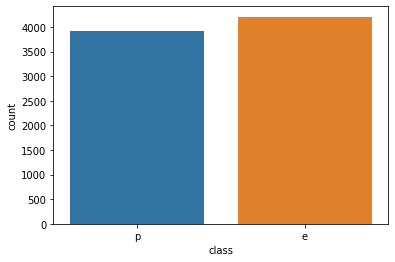

In [5]:
sns.countplot(data=df, x='class')

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
unique_features = df.describe().transpose().reset_index().sort_values('unique')

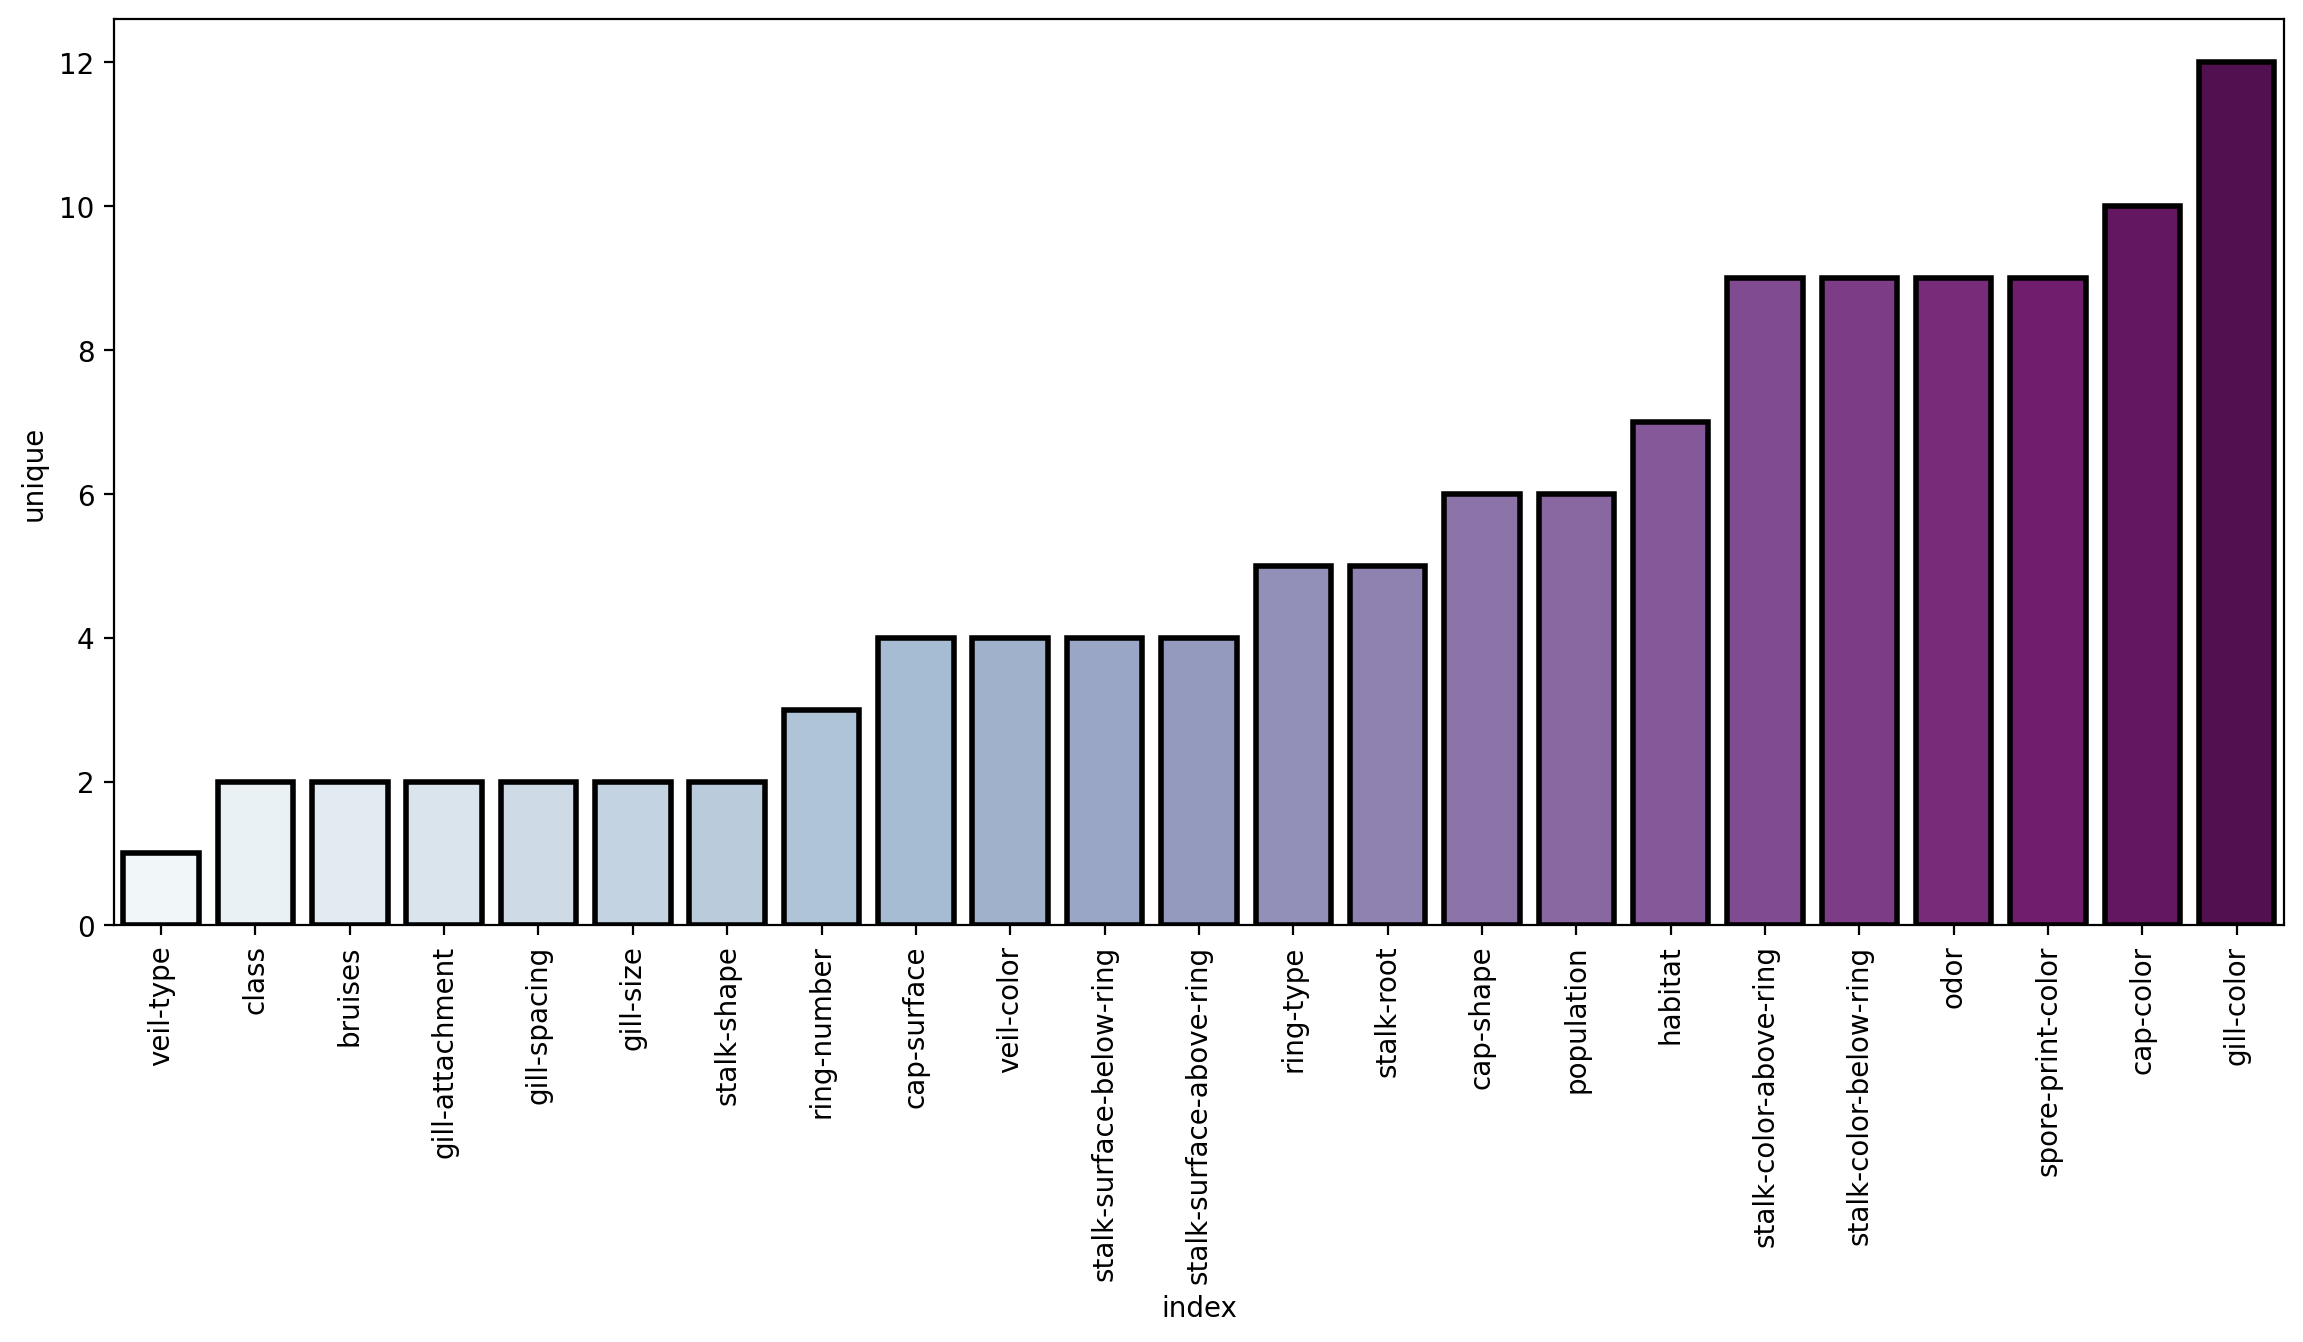

In [8]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=unique_features, x='index', y='unique',
           palette='BuPu', edgecolor='black', linewidth=2)
plt.xticks(rotation=90);

In [9]:
X = df.drop('class', axis=1)

### X is having the categorical letters and for boosting ML Algorithms, those are eventually passing the Decision Tree and that need Dummy Variables!

In [10]:
X.isnull().sum()

# Hence no null values -> No missiing data

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
X = pd.get_dummies(X, drop_first=True)

# drop_first = True, so we don't have the duplicate information there!

In [12]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [16]:
from sklearn.ensemble import AdaBoostClassifier

### Parameters:
* base_estimator: The base estimator from which the boosted ensemble is built. If None, then the base estimator is **DecisionTreeClassifier** initiallized with **max_depth=1(which is basically the STUMP)**

In [17]:
model = AdaBoostClassifier(n_estimators=1)

# means AdaBoostClassifier has to figure out single best feature for to split on!

In [18]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [19]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [20]:
predictions = model.predict(X_test)

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [22]:
model.feature_importances_

# our model is techniqually just a single stump, which means it's gonna say 1 feature which is 100% important to models capability to predict!

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
model.feature_importances_.argmax()

# reports back the index where that 1 is!

22

In [24]:
X.columns[22]

'odor_n'

<AxesSubplot: xlabel='odor', ylabel='count'>

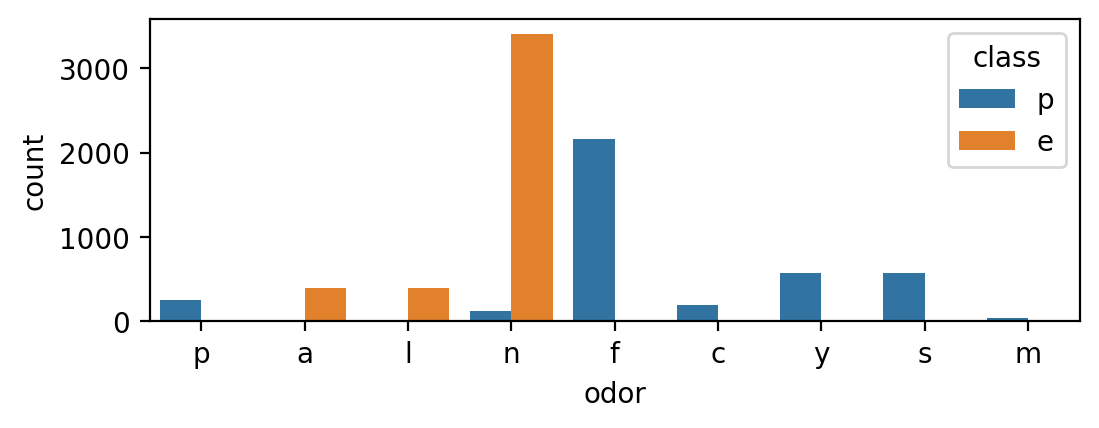

In [25]:
plt.figure(figsize=(6,2), dpi=200)
sns.countplot(data=df, x='odor', hue='class')

# n: indicates that most mushrooms don't actually have an ODOR!

In [26]:
len(X.columns)

95

In [27]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(error)

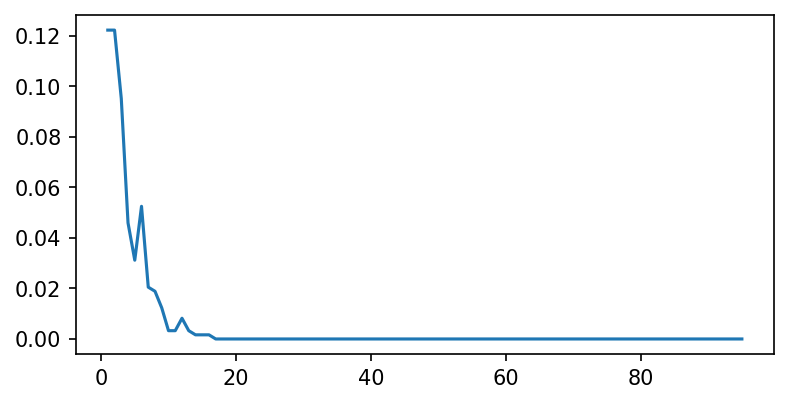

In [28]:
plt.figure(figsize=(6,3), dpi=150)
plt.plot(range(1,96), error_rates)

#### Note: as we add in more stumps, coefficients applied to each of those stumps, kindof coefficients applied to each of those subset of features!

In [29]:
features_ = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns=['Importance'])

#### below we can see that most of the features, the model does not really care about, coz when we consider 95 features that means 95 stumps, it probably has many coefficients, so it says... this stumps doesn't contribute more into importance because when coefficient is multiplied with hypothesis, because hypothesis might not be a good seperator! Hence we got so many zeros below

In [30]:
features_

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [31]:
imp_features = features_[features_['Importance'] > 0]

In [32]:
imp_features

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


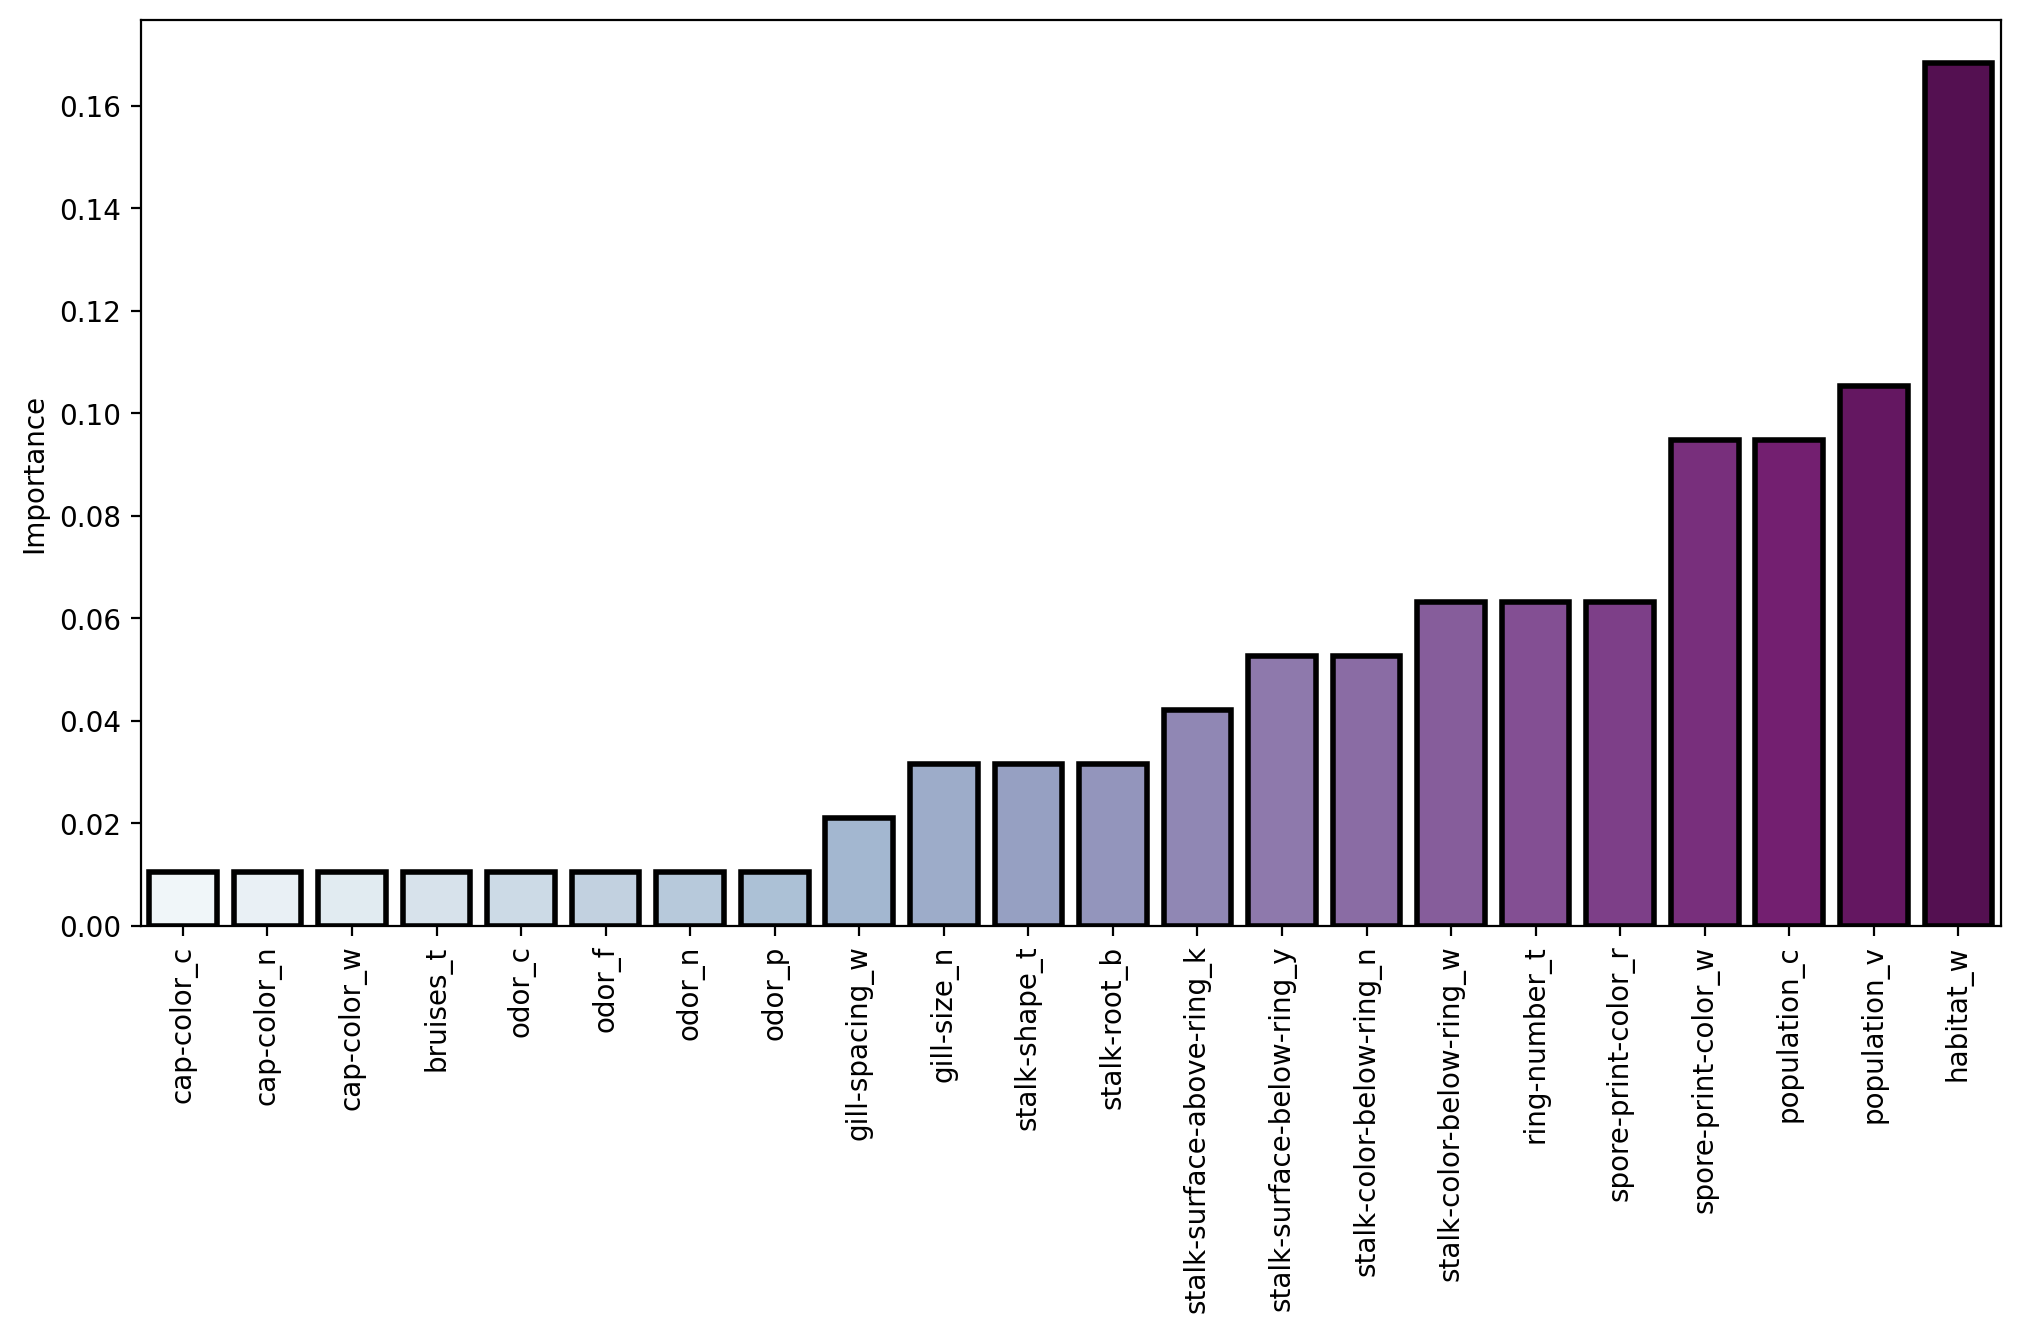

In [33]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(data=imp_features.sort_values("Importance"), x=imp_features.index, y='Importance', palette='BuPu',
           edgecolor = 'black', linewidth=2)

plt.xticks(rotation=90);

# this is for the n_estimators = 95
# EXERCISE: 
# what if we ideally pickup n_estimators = 18 and then check again this graph

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
adaboost_model = AdaBoostClassifier()

In [36]:
param_grid = {'n_estimators':[15,16,17,18,19,20]}

In [37]:
grid = GridSearchCV(adaboost_model, param_grid)

In [38]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [15, 16, 17, 18, 19, 20]})

In [39]:
grid.best_params_

{'n_estimators': 20}

In [40]:
updated_model = AdaBoostClassifier(n_estimators=20)

In [41]:
updated_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20)

In [42]:
preds = updated_model.predict(X_test)

In [43]:
error = 1 - accuracy_score(y_test, preds)

In [44]:
error

0.0

In [45]:
updated_features_ = pd.DataFrame(index = X.columns, data = updated_model.feature_importances_, columns=['Importance'])

In [46]:
updated_imp_features = updated_features_[updated_features_['Importance'] > 0]

In [47]:
updated_imp_features

,Importance
cap-color_w,0.05
bruises_t,0.05
odor_c,0.05
odor_f,0.05
odor_n,0.10
odor_p,0.05
gill-spacing_w,0.05
gill-size_n,0.15
stalk-surface-above-ring_k,0.05
stalk-surface-below-ring_y,0.05


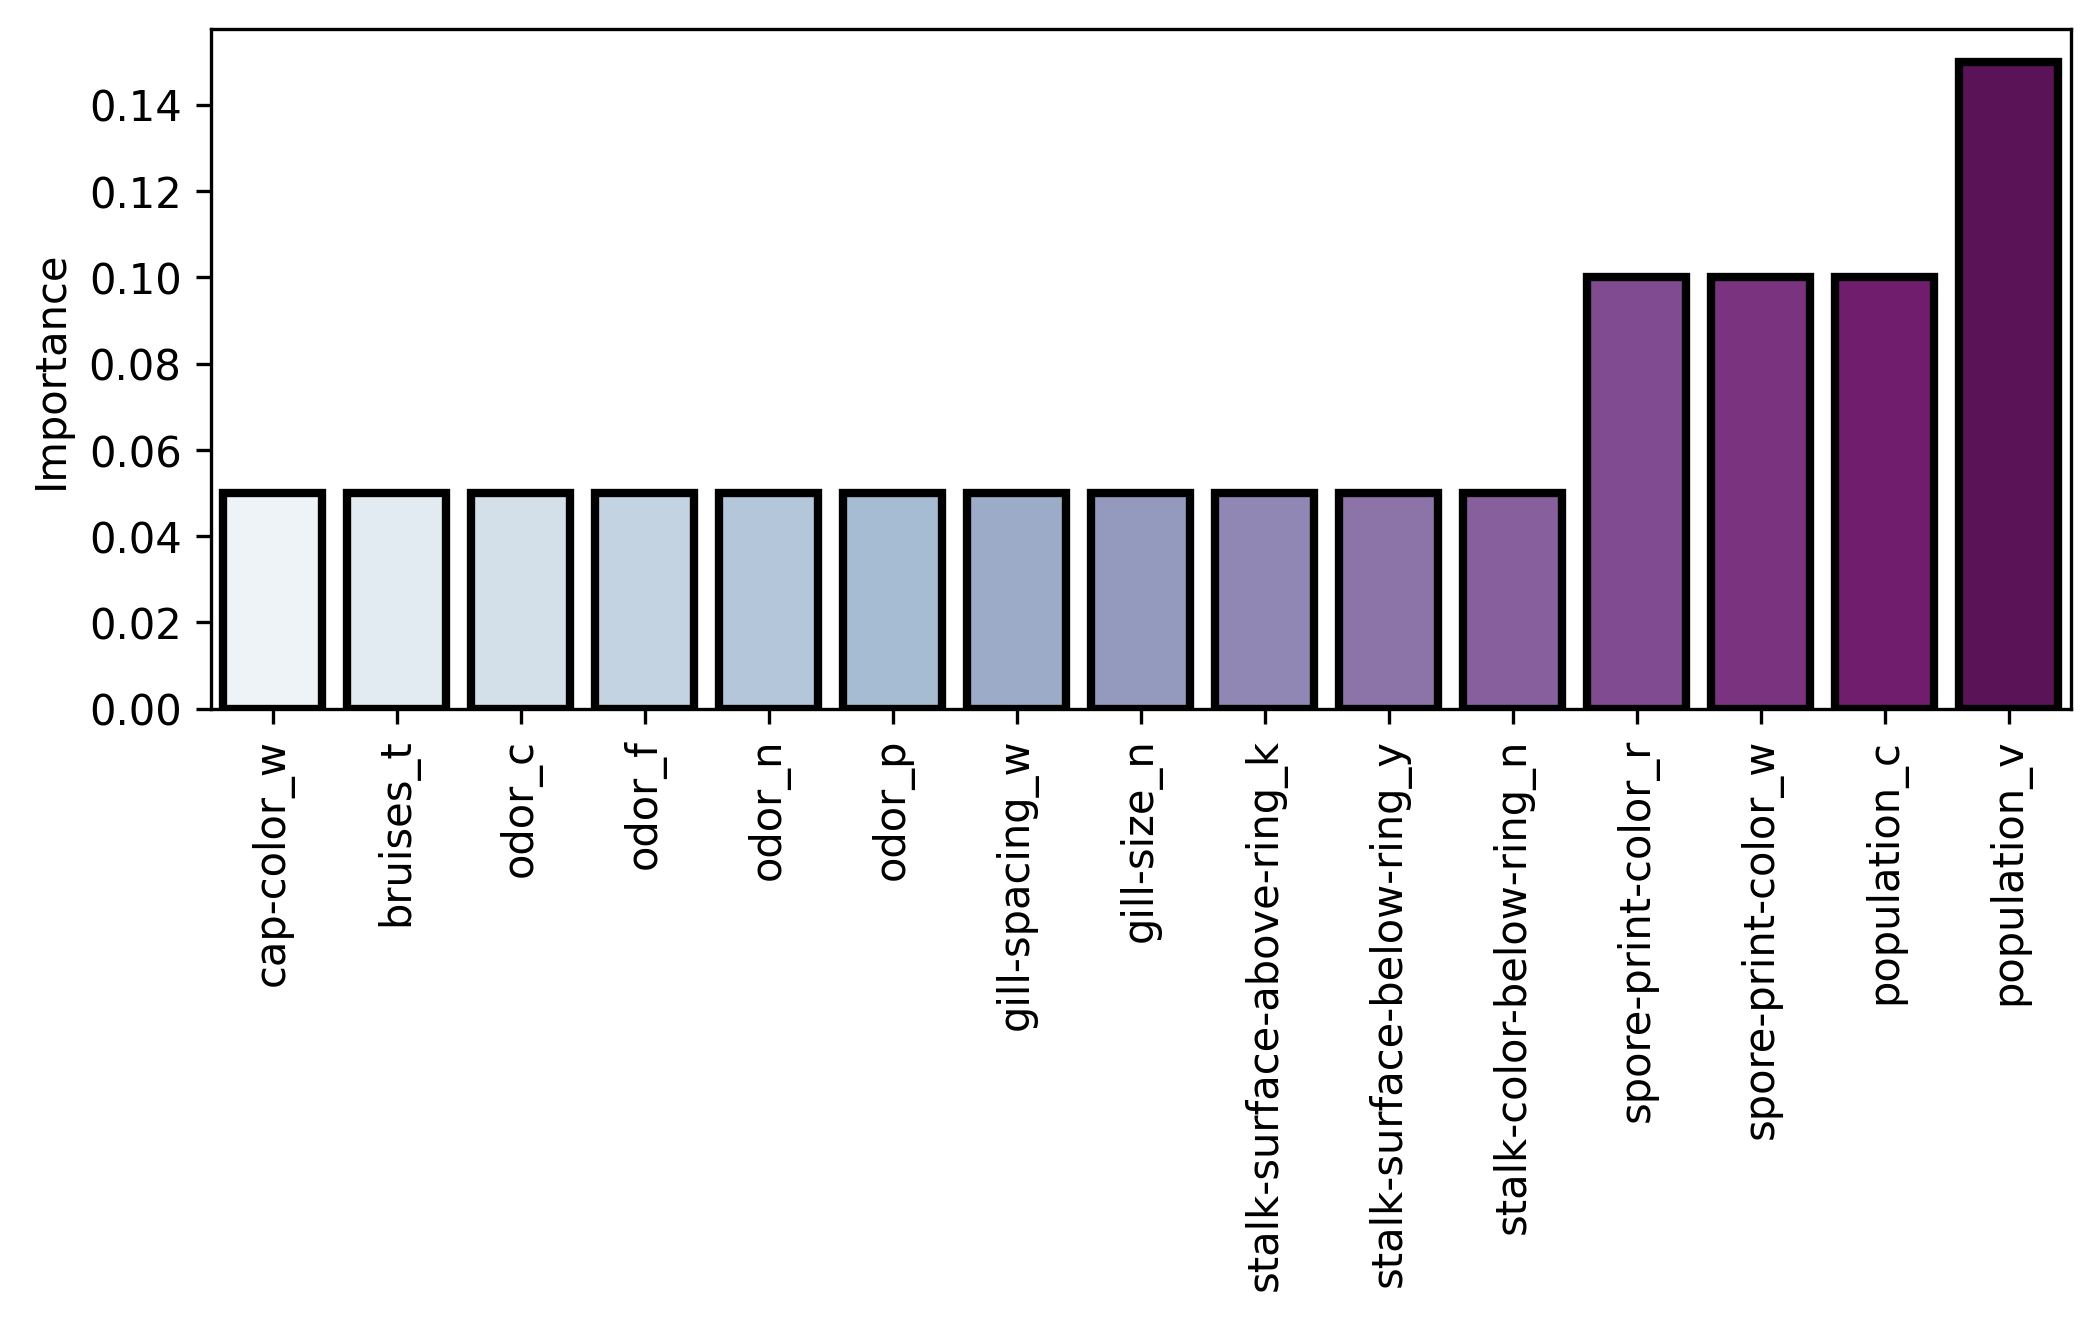

In [48]:
plt.figure(figsize=(8,3), dpi=300)
sns.barplot(data=updated_imp_features.sort_values('Importance'), x=updated_imp_features.index, y='Importance', palette='BuPu',
           edgecolor='black', linewidth=2)

plt.xticks(rotation=90);